In [48]:
import pandas as pd 

import warnings
import xlsxwriter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import Generative_model
from scipy import stats
from scipy.signal import savgol_filter
import pandas as pd
import ast
import copy
from scipy.stats import gaussian_kde

#all pymc3 requirement
import pymc3 as pm
import theano.tensor as tt
import theano as th
import arviz as az



from pymc3 import Model, Normal, Slice, sample, Uniform, Binomial, HalfNormal
from pymc3.distributions import Interpolated



process the code and read the file in

In [8]:
df_adaptive = pd.read_csv("adaptive_samples2.csv")
df_random = pd.read_csv("random_samples2.csv")
theta = range(-8,9)
mu,sigma = 1,2
df_adaptive.shape



(50, 22)

how to plot the entropy:

Entropy_x -8     0.00174
Entropy_x -7    0.010836
Entropy_x -6    0.063436
Entropy_x -5    0.283589
Entropy_x -4    0.931061
Entropy_x -3    2.150884
Entropy_x -2    3.341238
Entropy_x -1    3.316705
Entropy_x 0     1.990259
Entropy_x 1     0.961372
Entropy_x 2     1.463041
Entropy_x 3     2.683785
Entropy_x 4     2.972525
Entropy_x 5     2.054341
Entropy_x 6      0.93927
Entropy_x 7     0.298746
Entropy_x 8     0.069275
Name: 49, dtype: object


Text(0, 0.5, 'Estimated entropy')

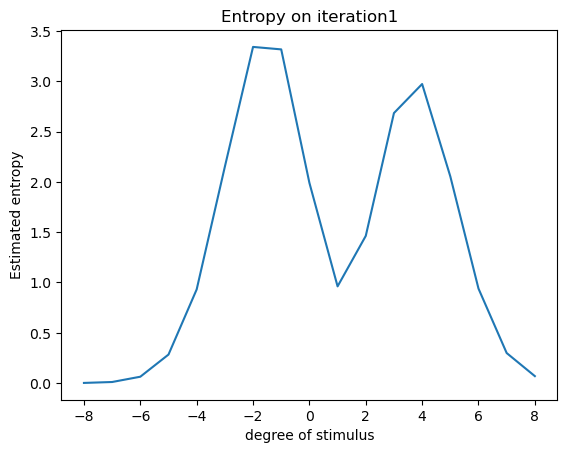

In [26]:
# Plotting the data

plt.plot(range(-8, 9), df_adaptive.loc[49 , df_adaptive.columns[1:18]], label='Entropy',linestyle = '-')  # Add a label for the legend
index_entropy = 1
# Adding title and labels
plt.title('Entropy on iteration' + str(index_entropy) )
plt.xlabel('degree of stimulus')
plt.ylabel('Estimated entropy')

how to plot the posterior
 

In [41]:

def plot_posterior(ax, lambda_list, color, label,name):
    for i in lambda_list:
        ax.plot(theta, stats.norm(loc=i[0], scale=i[1]).cdf(theta), alpha=0.01, color=color)
    ax.plot(theta, stats.norm(loc=1, scale=2).cdf(theta), color="r", label="posterior")
    ax.plot(theta, stats.norm(loc=1, scale=2).cdf(theta), color="b", label="ground truth")
    ax.set_title(name)
    ax.set_xlabel('Degree of stimulus')
    ax.set_ylabel('Probability')
    ax.legend()

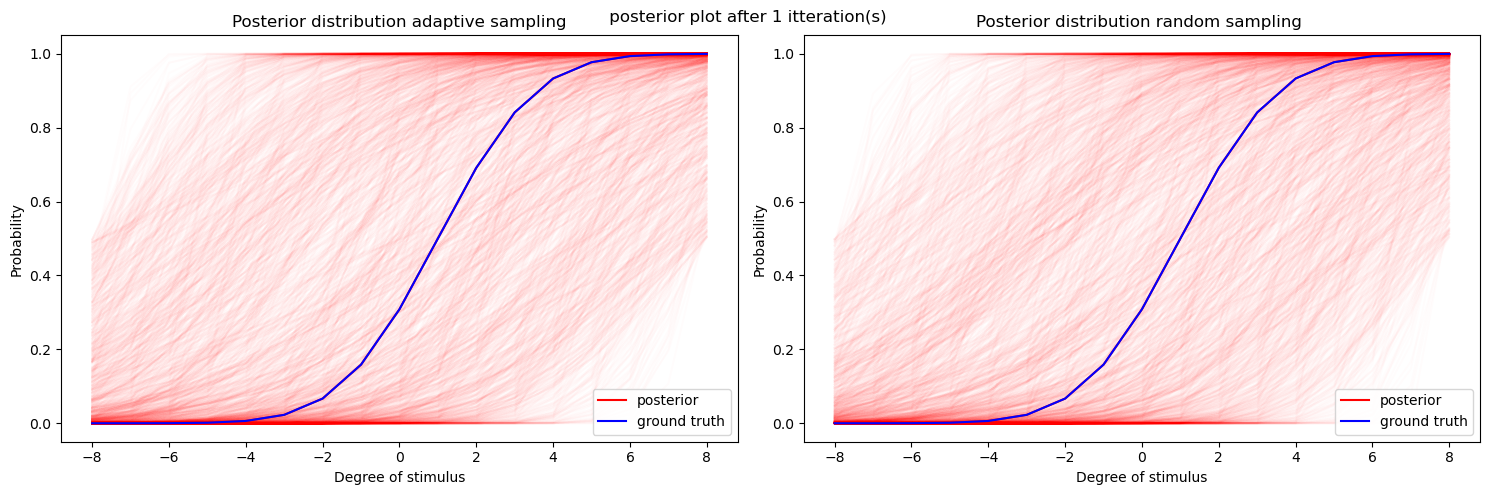

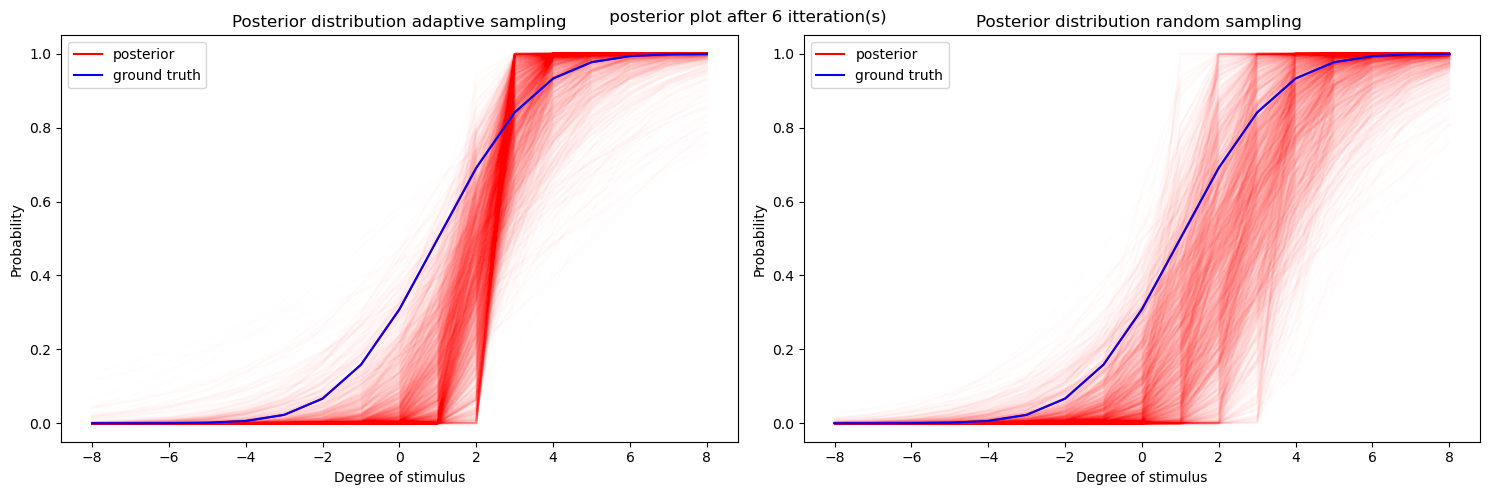

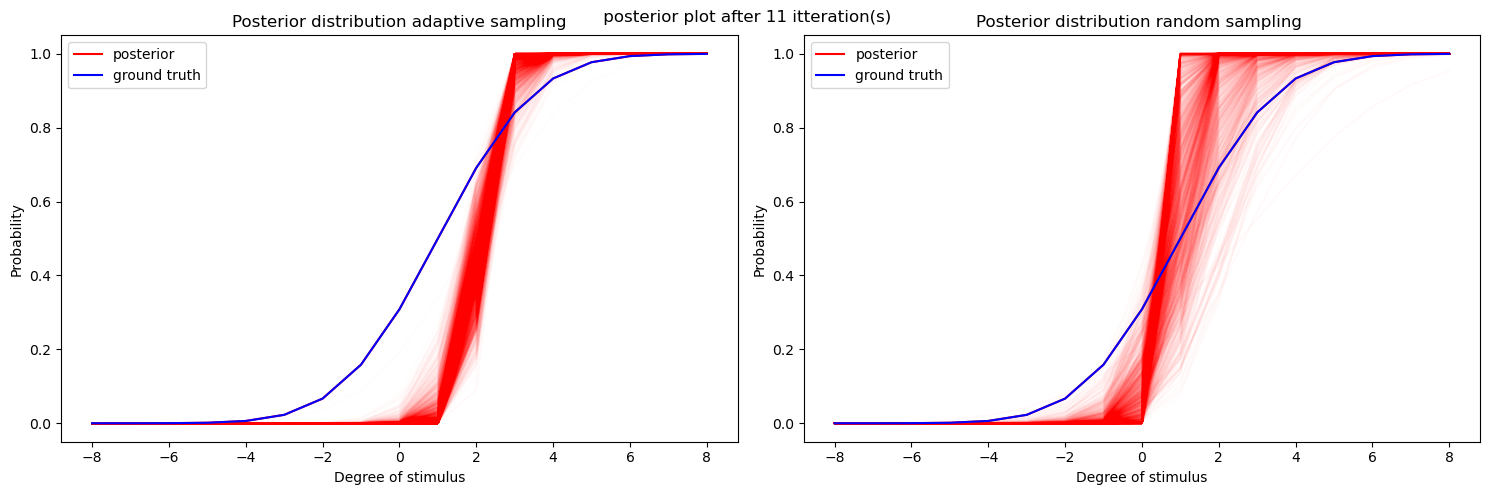

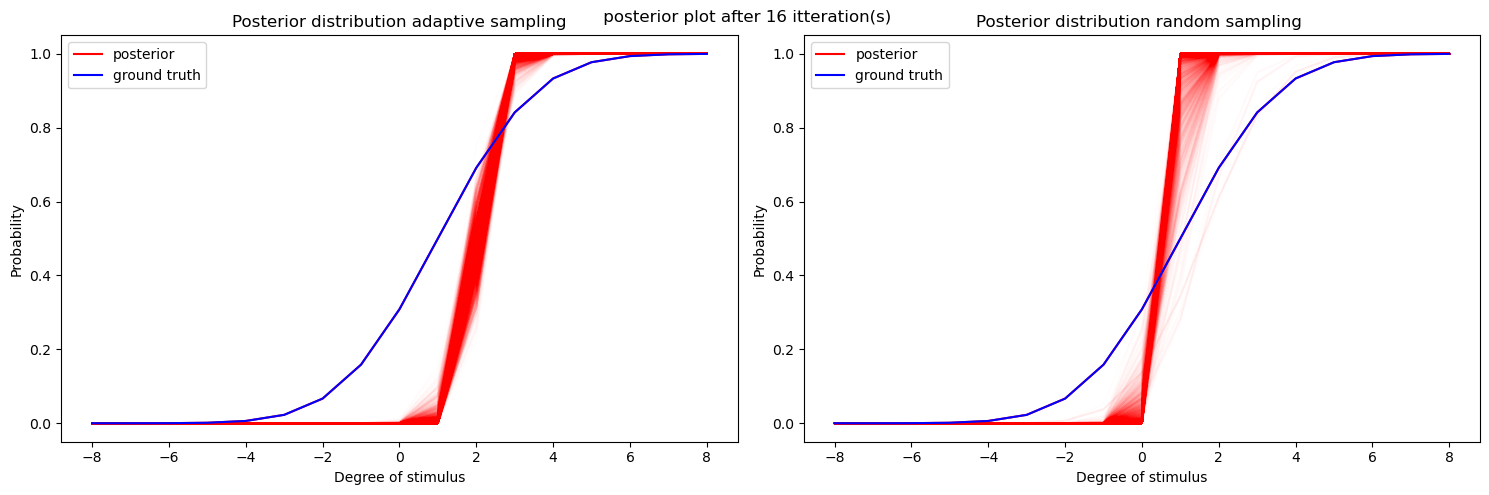

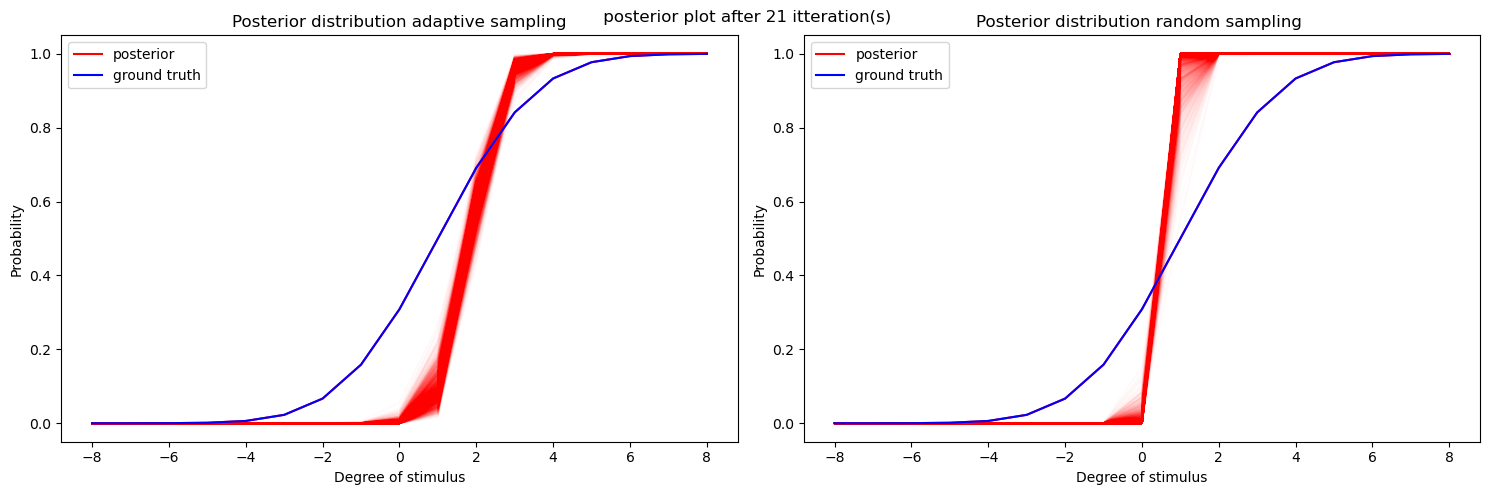

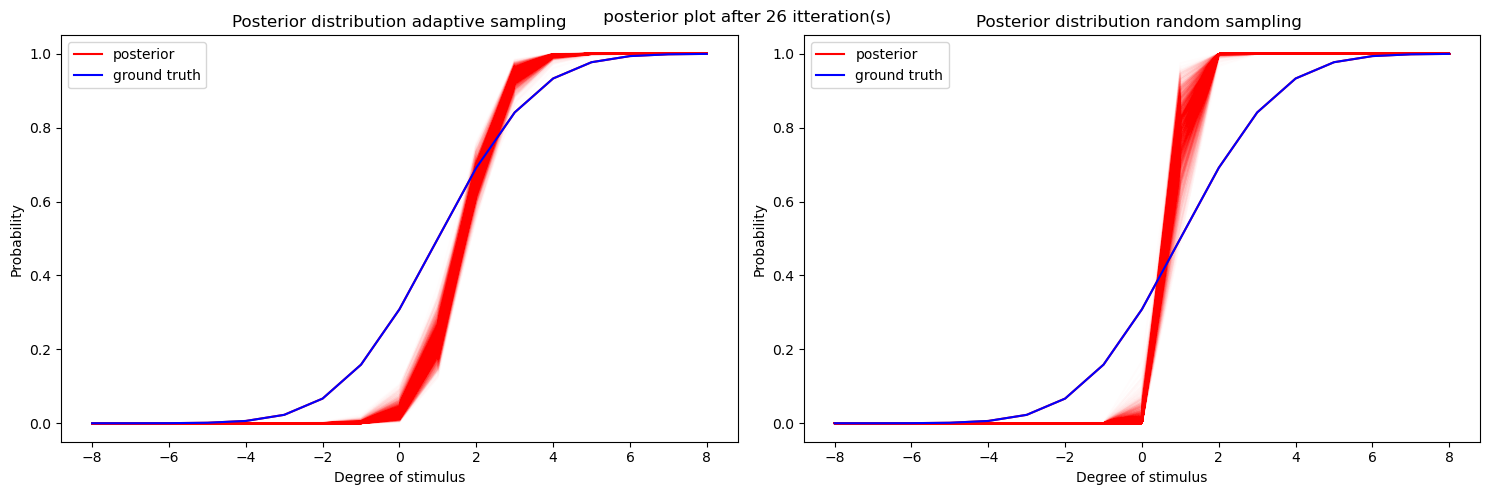

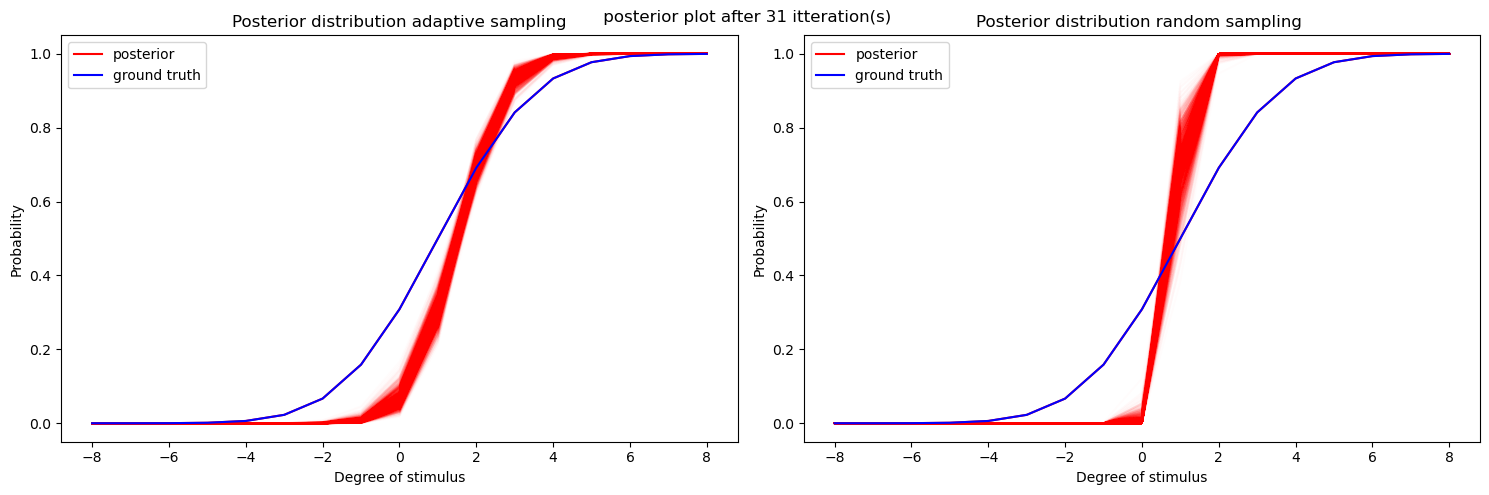

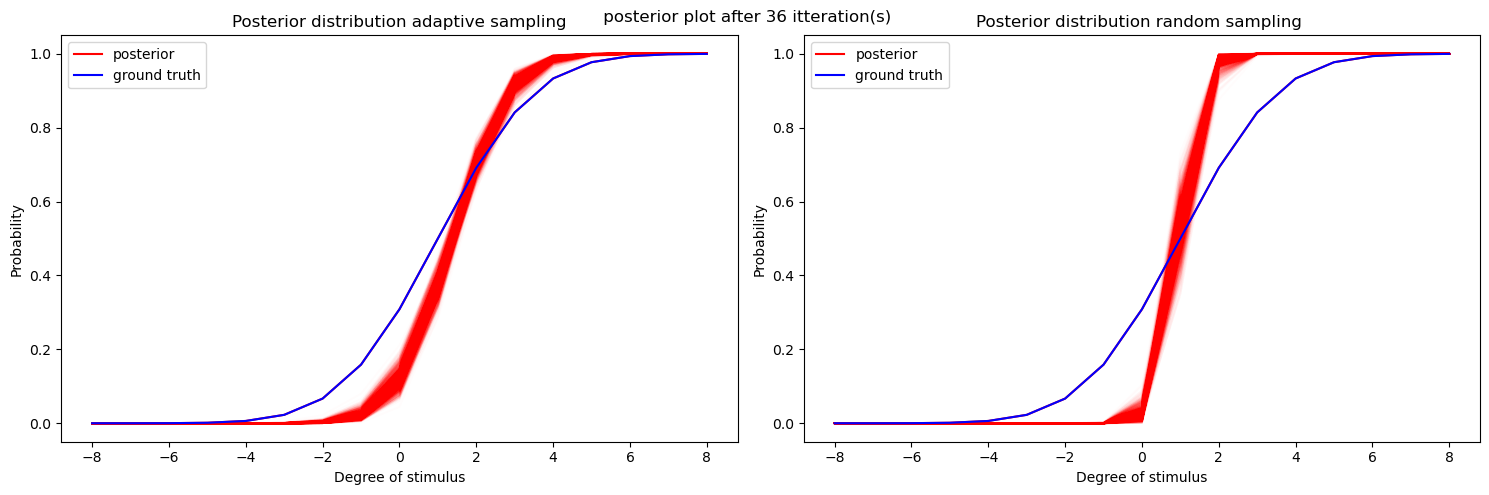

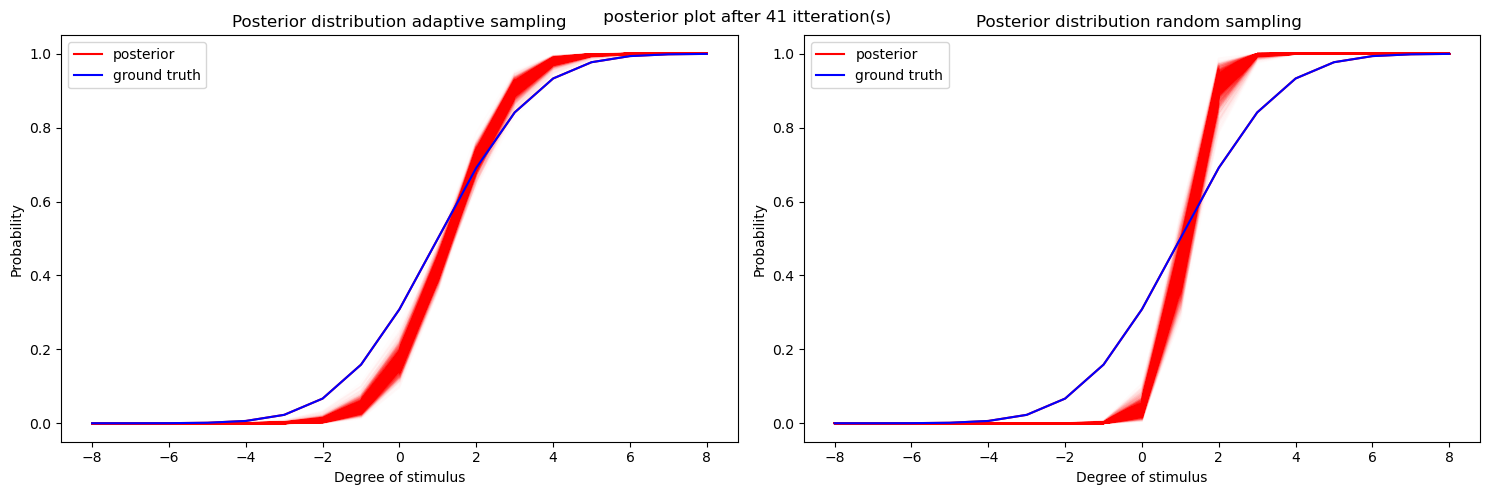

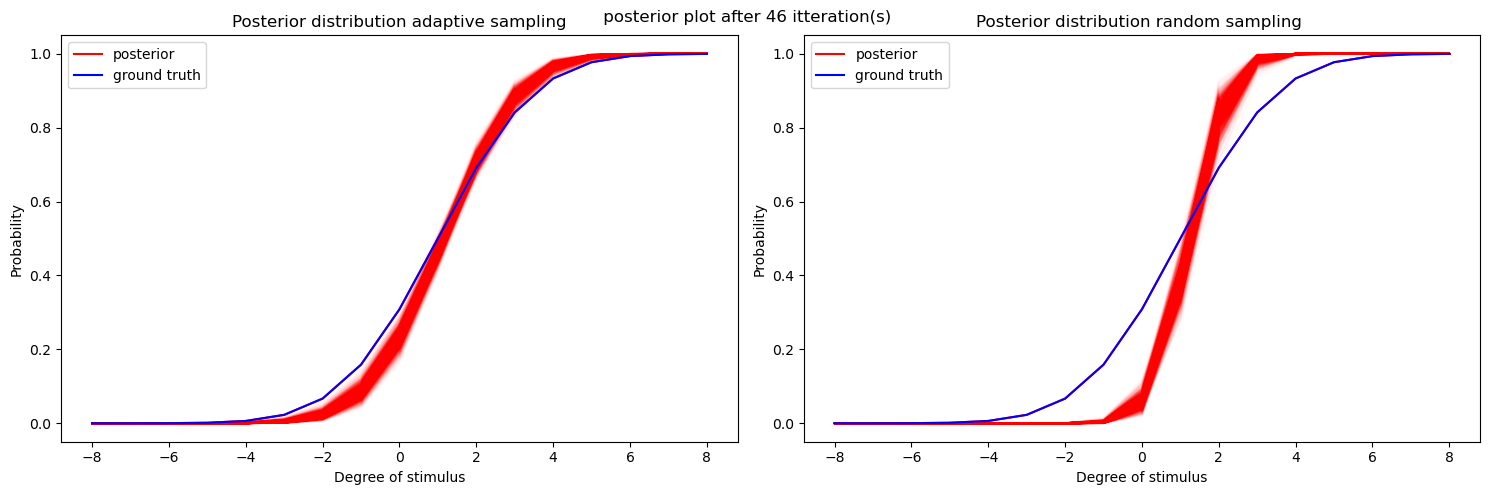

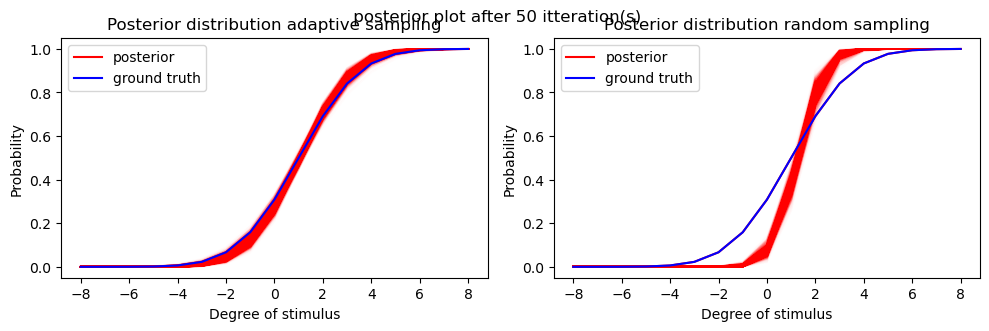

In [59]:
# Create a subplot with 1 row and 2 columns
for j in range(0,49,5):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))



    # Plot posterior distributions for adaptive sampling
    lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[j])
    plot_posterior(axs[0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)",name="Posterior distribution adaptive sampling")


    # Plot posterior distributions for random sampling
    lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[j])
    plot_posterior(axs[1], lambda_list_random, color="r",label="posterior samples (Random)", name="Posterior distribution random sampling ")

    # Adjust layout for better spacing
    plt.tight_layout()
    fig.suptitle(' posterior plot after '+ str(j+1) + ' itteration(s)')
    # Show the plots
    plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, (10/3)))




# Plot posterior distributions for adaptive sampling
lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[49])
plot_posterior(axs[0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)",name="Posterior distribution adaptive sampling")


# Plot posterior distributions for random sampling
lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[49])
plot_posterior(axs[1], lambda_list_random, color="r",label="posterior samples (Random)", name="Posterior distribution random sampling")

# Adjust layout for better spacing
plt.tight_layout()
fig.suptitle(' posterior plot after '+ str(50) + ' itteration(s)')
# Show the plots
plt.show()

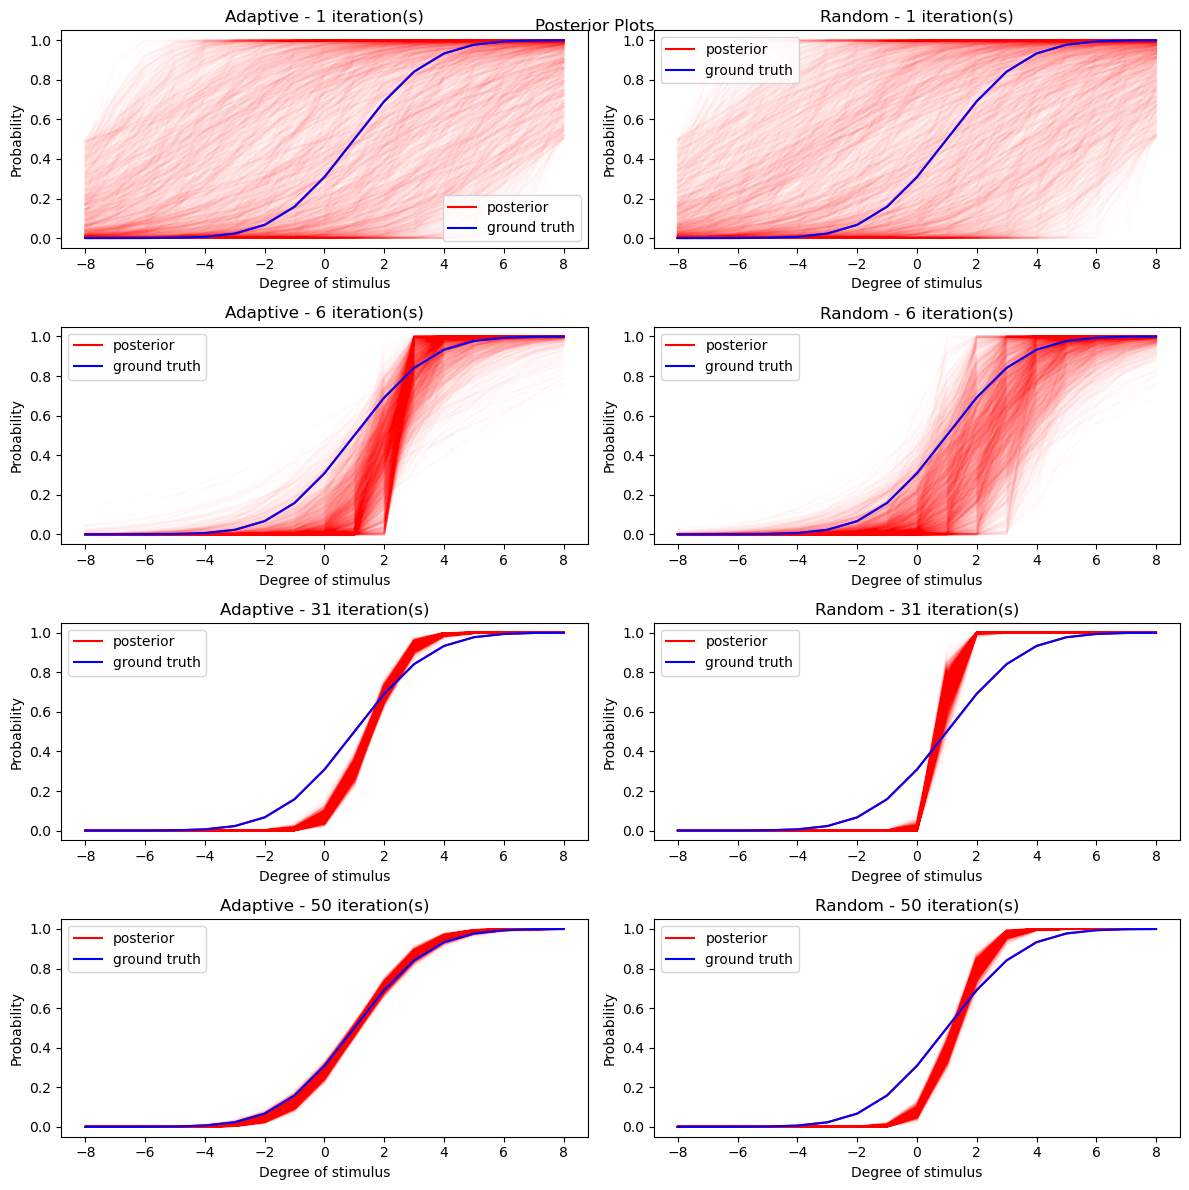

In [82]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Plot posterior distributions for adaptive sampling - index 0
lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[0])
plot_posterior(axs[0, 0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)", name="Posterior distribution adaptive sampling")
axs[0, 0].set_title('Adaptive - 1 iteration(s)')

# Plot posterior distributions for random sampling - index 0
lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[0])
plot_posterior(axs[0, 1], lambda_list_random, color="r", label="posterior samples (Random)", name="Posterior distribution random sampling")
axs[0, 1].set_title('Random - 1 iteration(s)')

# Plot posterior distributions for adaptive sampling - index 5
lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[5])
plot_posterior(axs[1, 0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)", name="Posterior distribution adaptive sampling")
axs[1, 0].set_title('Adaptive - 6 iteration(s)')

# Plot posterior distributions for random sampling - index 5
lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[5])
plot_posterior(axs[1, 1], lambda_list_random, color="r", label="posterior samples (Random)", name="Posterior distribution random sampling")
axs[1, 1].set_title('Random - 6 iteration(s)')

# Plot posterior distributions for adaptive sampling - index 30
lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[30])
plot_posterior(axs[2, 0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)", name="Posterior distribution adaptive sampling")
axs[2, 0].set_title('Adaptive - 31 iteration(s)')

# Plot posterior distributions for random sampling - index 30
lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[30])
plot_posterior(axs[2, 1], lambda_list_random, color="r", label="posterior samples (Random)", name="Posterior distribution random sampling")
axs[2, 1].set_title('Random - 31 iteration(s)')

# Plot posterior distributions for adaptive sampling - index 49
lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[49])
plot_posterior(axs[3, 0], lambda_list_adaptive, color="r", label="posterior samples (Adaptive)", name="Posterior distribution adaptive sampling")
axs[3, 0].set_title('Adaptive - 50 iteration(s)')

# Plot posterior distributions for random sampling - index 49
lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[49])
plot_posterior(axs[3, 1], lambda_list_random, color="r", label="posterior samples (Random)", name="Posterior distribution random sampling")
axs[3, 1].set_title('Random - 50 iteration(s)')

# Adjust layout for better spacing
plt.tight_layout()
fig.suptitle('Posterior Plots')

# Show the plots
plt.show()

plot to display samples picked


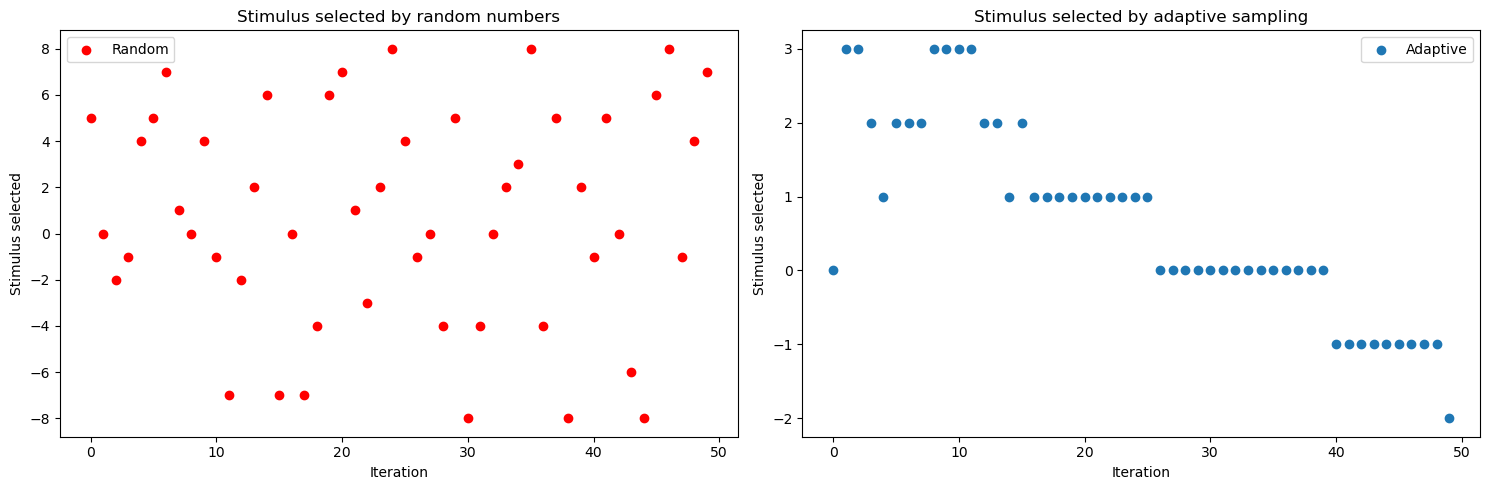

In [25]:

# Define the range for iterations
iteration = range(50)

# Create a subplot with 2 rows and 1 column
fig, axs = plt.subplots(1, 2,figsize=(10, (10/3)))


# First scatter plot
data_scatter_random = df_random["stimulus_used"]
axs[0].scatter(iteration, data_scatter_random,color="r")
axs[0].set_title('Stimulus selected by random numbers')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Stimulus selected')
axs[0].legend(['Random'])

# Second scatter plot
data_scatter_adaptive = df_adaptive["stimulus_used"]
axs[1].scatter(iteration, data_scatter_adaptive)
axs[1].set_title('Stimulus selected by adaptive sampling')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Stimulus selected')
axs[1].legend(['Adaptive'])

# Adjust layout for better spacing
plt.tight_layout()
fig.suptitle('stimulus selected per itteration')

# Show the plots
plt.show()

contour plot 

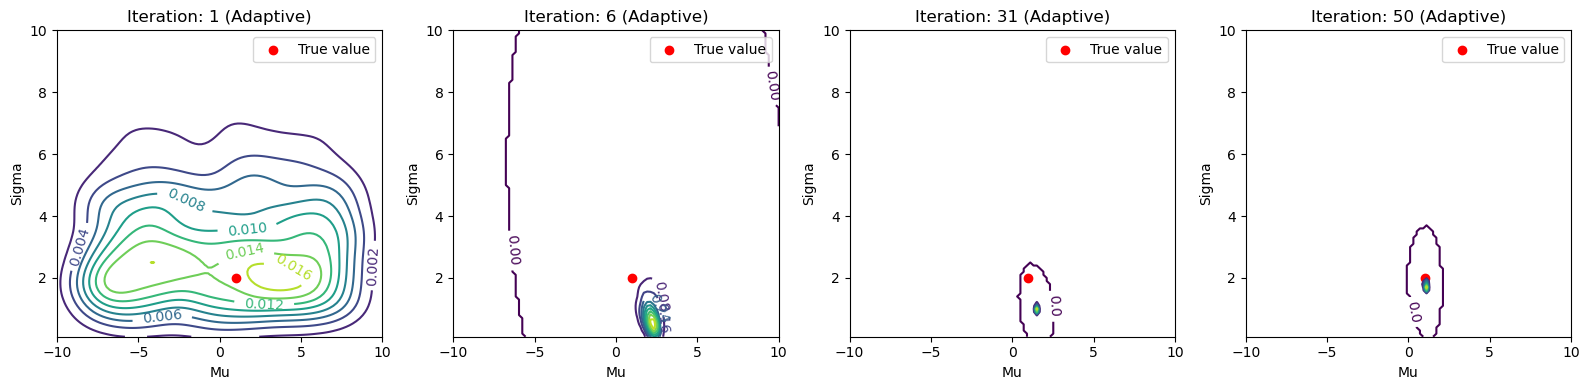

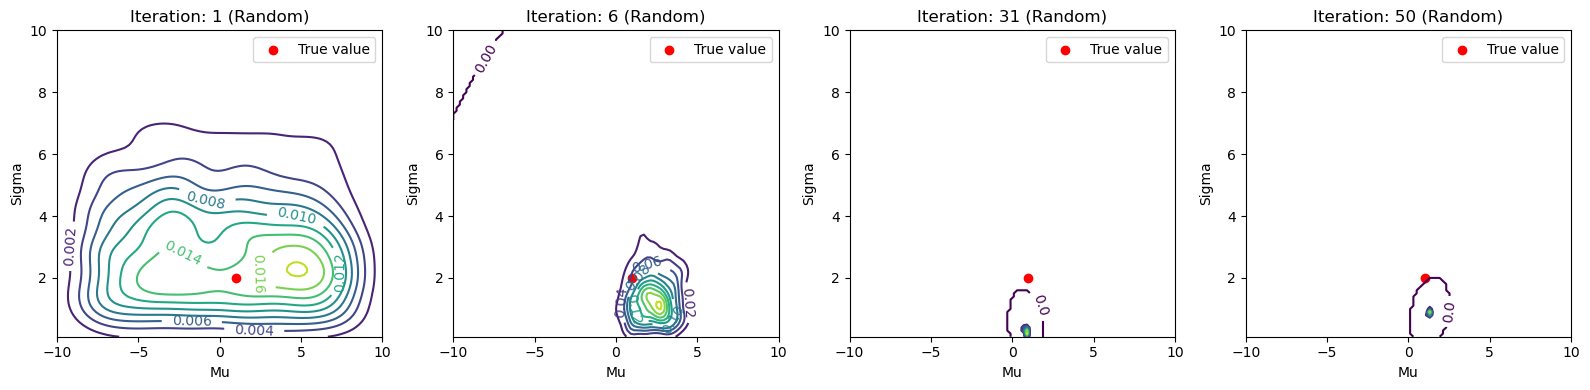

In [90]:
# Indexes to plot
indexes = [0, 5, 30, 49]

# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, len(indexes), figsize=(16, 4))

for i, index in enumerate(indexes):
    # Extract the lambda list for adaptive sampling
    lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[index])

    # Extract mu and sigma values for adaptive sampling
    mu_values_adaptive = [pair[0] for pair in lambda_list_adaptive]
    sigma_values_adaptive = [pair[1] for pair in lambda_list_adaptive]

    # Extract the lambda list for random sampling
    lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[index])

    # Extract mu and sigma values for random sampling
    mu_values_random = [pair[0] for pair in lambda_list_random]
    sigma_values_random = [pair[1] for pair in lambda_list_random]

    # Create a grid of mu and sigma values
    mu_grid = np.linspace(-10, 10, 100)
    sigma_grid = np.linspace(0.1, 10, 100)
    mu_grid, sigma_grid = np.meshgrid(mu_grid, sigma_grid)

    # Evaluate the density on the grid for adaptive sampling
    kde_adaptive = gaussian_kde([mu_values_adaptive, sigma_values_adaptive])
    density_adaptive = kde_adaptive([mu_grid.ravel(), sigma_grid.ravel()]).reshape(mu_grid.shape)

    # Evaluate the density on the grid for random sampling
    kde_random = gaussian_kde([mu_values_random, sigma_values_random])
    density_random = kde_random([mu_grid.ravel(), sigma_grid.ravel()]).reshape(mu_grid.shape)

    # Contour plot for adaptive sampling
    contour_adaptive = axs[i].contour(mu_grid, sigma_grid, density_adaptive, levels=10)
    axs[i].clabel(contour_adaptive, inline=1, fontsize=10)
    axs[i].scatter(1, 2, color='r', label='True value')
    axs[i].set_title(f"Iteration: {index + 1} (Adaptive)")
    axs[i].set_xlabel('Mu')
    axs[i].set_ylabel('Sigma')
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


fig, axs = plt.subplots(1, len(indexes), figsize=(16, 4))

for i, index in enumerate(indexes):
    # Extract the lambda list for adaptive sampling
    lambda_list_adaptive = ast.literal_eval(df_adaptive["lambda_list"].iloc[index])

    # Extract mu and sigma values for adaptive sampling
    mu_values_adaptive = [pair[0] for pair in lambda_list_adaptive]
    sigma_values_adaptive = [pair[1] for pair in lambda_list_adaptive]

    # Extract the lambda list for random sampling
    lambda_list_random = ast.literal_eval(df_random["lambda_list"].iloc[index])

    # Extract mu and sigma values for random sampling
    mu_values_random = [pair[0] for pair in lambda_list_random]
    sigma_values_random = [pair[1] for pair in lambda_list_random]

    # Create a grid of mu and sigma values
    mu_grid = np.linspace(-10, 10, 100)
    sigma_grid = np.linspace(0.1, 10, 100)
    mu_grid, sigma_grid = np.meshgrid(mu_grid, sigma_grid)

    # Evaluate the density on the grid for adaptive sampling
    kde_adaptive = gaussian_kde([mu_values_adaptive, sigma_values_adaptive])
    density_adaptive = kde_adaptive([mu_grid.ravel(), sigma_grid.ravel()]).reshape(mu_grid.shape)

    # Evaluate the density on the grid for random sampling
    kde_random = gaussian_kde([mu_values_random, sigma_values_random])
    density_random = kde_random([mu_grid.ravel(), sigma_grid.ravel()]).reshape(mu_grid.shape)


    # Contour plot for random sampling
    contour_random = axs[i].contour(mu_grid, sigma_grid, density_random, levels=10)
    axs[i].clabel(contour_random, inline=1, fontsize=10)
    axs[i].scatter(1, 2, color='r', label='True value')
    axs[i].set_title(f"Iteration: {index + 1} (Random)")
    axs[i].set_xlabel('Mu')
    axs[i].set_ylabel('Sigma')
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


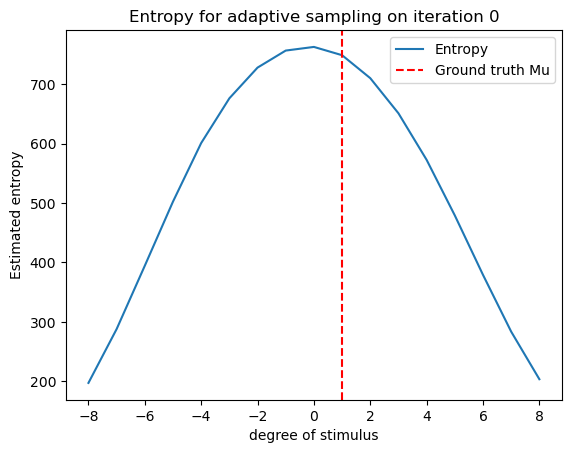

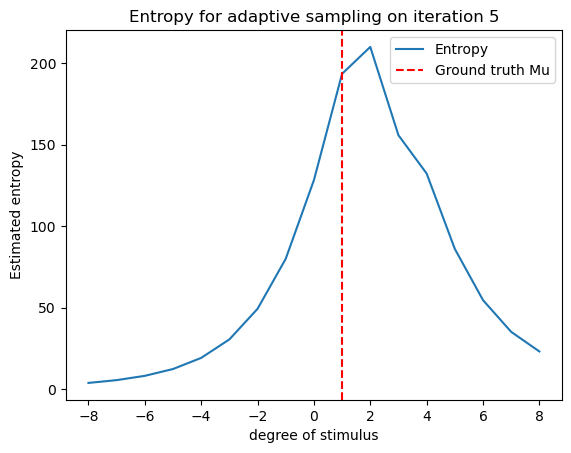

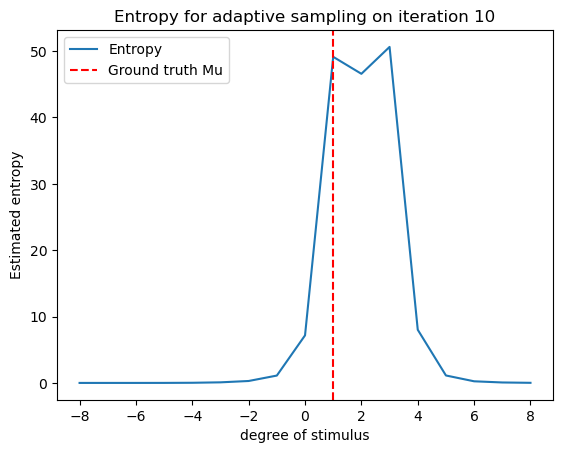

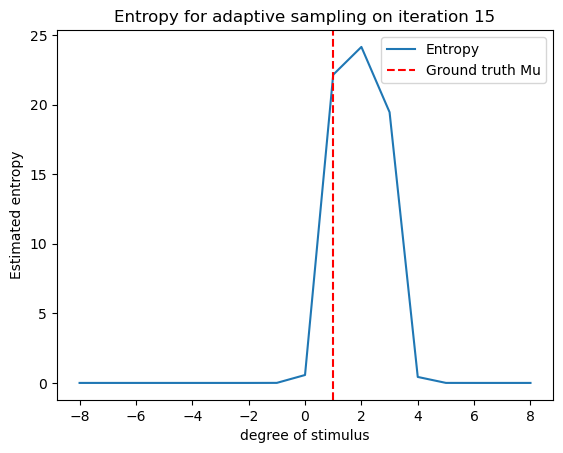

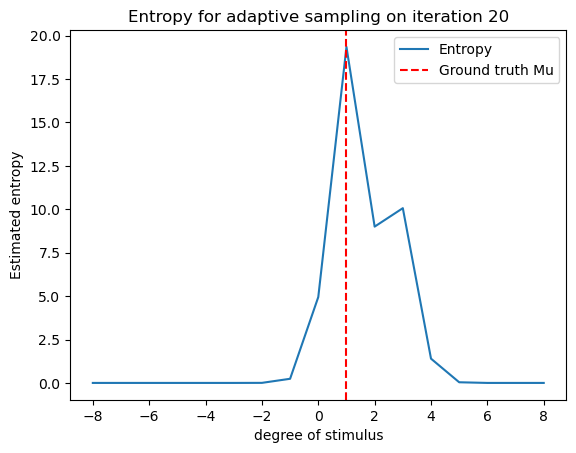

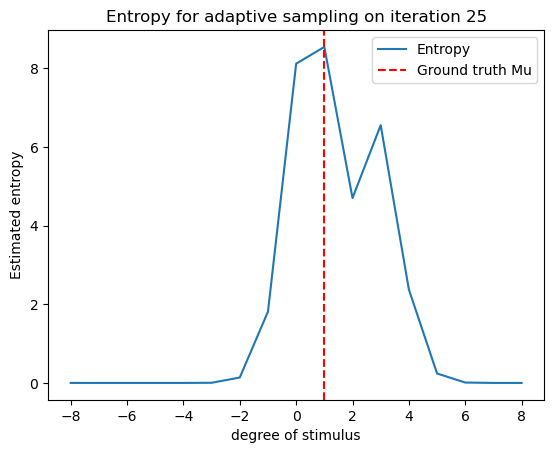

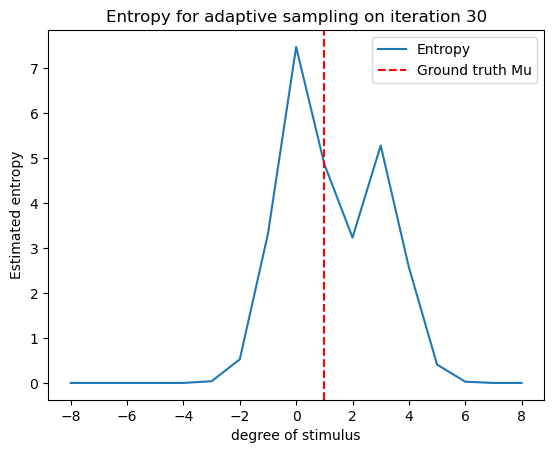

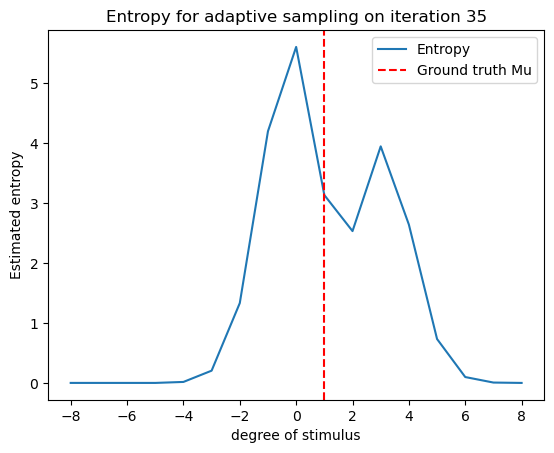

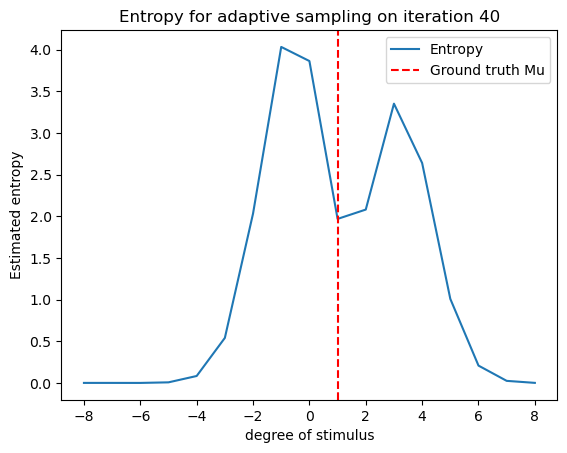

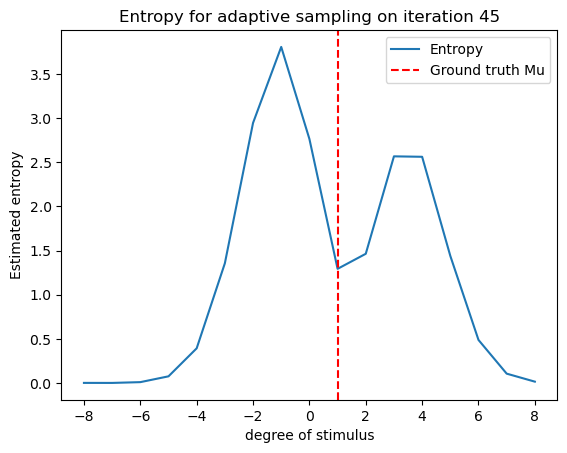

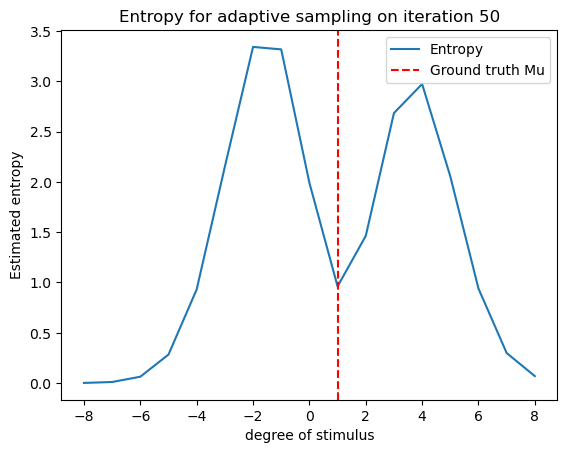

In [67]:
for i in range(0, 49,5):
    plt.plot(range(-8, 9), df_adaptive.loc[i, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')  # Add a label for the legend
    # Adding title and labels
    plt.title('Entropy for adaptive sampling on iteration ' + str(i))
    plt.xlabel('degree of stimulus')
    plt.ylabel('Estimated entropy')
    plt.axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
    plt.legend()
    plt.show()
plt.plot(range(-8, 9), df_adaptive.loc[49, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')  # Add a label for the legend
# Adding title and labels
plt.title('Entropy for adaptive sampling on iteration ' + str(50))
plt.xlabel('degree of stimulus')
plt.ylabel('Estimated entropy')
plt.axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
plt.legend()
plt.show()

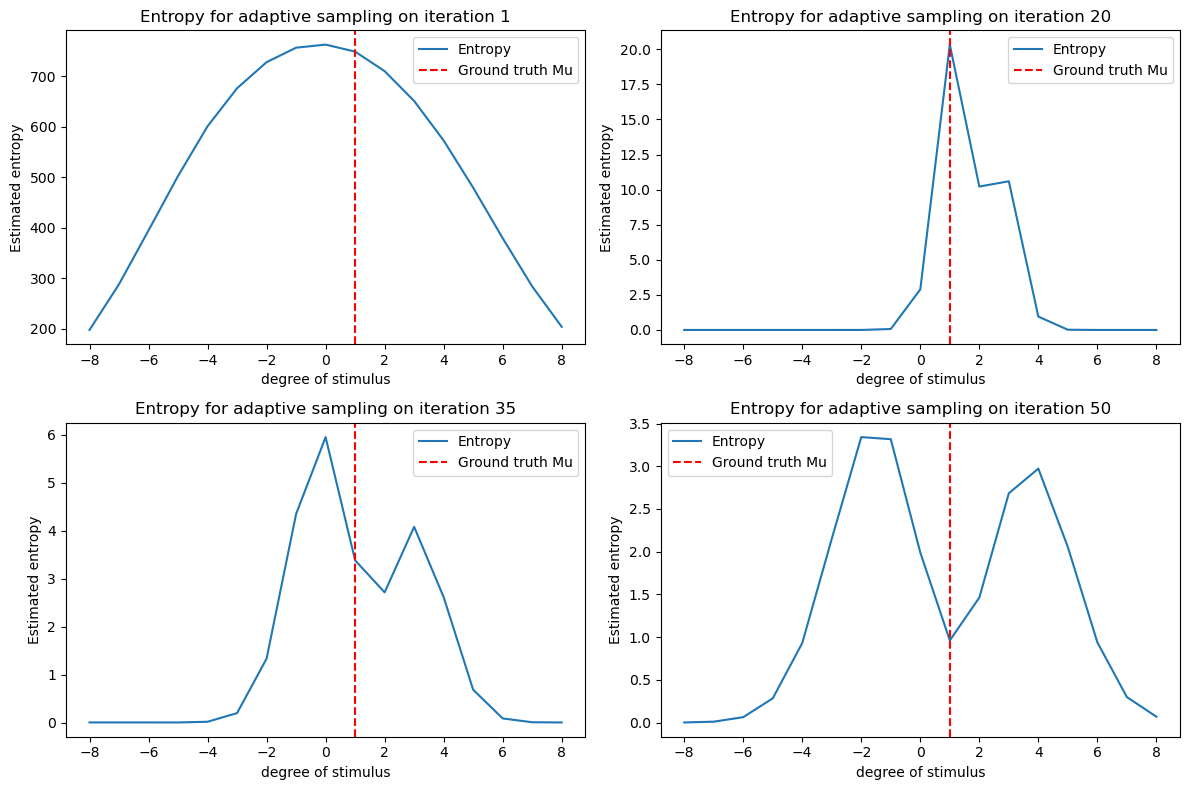

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot for iteration 1 (index 0)
axs[0, 0].plot(range(-8, 9), df_adaptive.loc[0, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')
axs[0, 0].set_title('Entropy for adaptive sampling on iteration 1')
axs[0, 0].set_xlabel('degree of stimulus')
axs[0, 0].set_ylabel('Estimated entropy')
axs[0, 0].axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
axs[0, 0].legend()

# Plot for iteration 20 (index 19)
axs[0, 1].plot(range(-8, 9), df_adaptive.loc[19, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')
axs[0, 1].set_title('Entropy for adaptive sampling on iteration 20')
axs[0, 1].set_xlabel('degree of stimulus')
axs[0, 1].set_ylabel('Estimated entropy')
axs[0, 1].axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
axs[0, 1].legend()

# Plot for iteration 35 (index 34)
axs[1, 0].plot(range(-8, 9), df_adaptive.loc[34, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')
axs[1, 0].set_title('Entropy for adaptive sampling on iteration 35')
axs[1, 0].set_xlabel('degree of stimulus')
axs[1, 0].set_ylabel('Estimated entropy')
axs[1, 0].axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
axs[1, 0].legend()

# Plot for iteration 50 (index 49)
axs[1, 1].plot(range(-8, 9), df_adaptive.loc[49, df_adaptive.columns[1:18]], label='Entropy', linestyle='-')
axs[1, 1].set_title('Entropy for adaptive sampling on iteration 50')
axs[1, 1].set_xlabel('degree of stimulus')
axs[1, 1].set_ylabel('Estimated entropy')
axs[1, 1].axvline(x=1, color='r', linestyle='--', label='Ground truth Mu')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# non result plots
plots that are used for display not actual data

In [ ]:
x = np.linspace(0, 16, 100)

# Generate probabilities using normal distribution CDF
normal_distribution = stats.norm(loc=8, scale=2)
normal_distribution_2 = stats.norm(loc=10, scale=0.5)
data = normal_distribution.cdf(x)
data_2 = normal_distribution_2.cdf(x)
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, data,label = "neuron 1, mu = 8, sigma = 2")
plt.plot(x, data_2,label = "neuron 2, mu = 10, sigma = 0,5")
plt.title("Cumulative Density Function of a Neuron")
plt.xlabel('Strength of Input Stimuli')
plt.ylabel('Probability of Neuron Firing')
plt.grid(True)
plt.legend()
plt.show()